<a href="https://colab.research.google.com/github/Archana-Nikam/Machine_Learning_task/blob/main/Image_Classification_Using_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Image Classification



Problem: Classify images of handwritten digits into categories (0-9).

1.Data Collection

In [7]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
# (x_train, y_train) is the training data
# (x_test, y_test) is the test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Print the shape of the data to understand the dataset
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


2.Data Processing

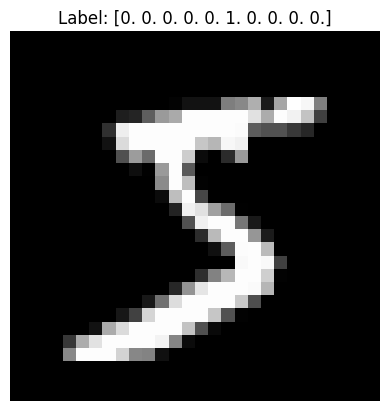

In [8]:
from tensorflow.keras.utils import to_categorical

# Normalize pixel values to the range [0, 1] for both training and test data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding for classification
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Display a sample image and its label to verify
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


3.Model Definition

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images into a vector
    Dense(128, activation='relu'), # Fully connected hidden layer with 128 neurons
    Dense(64, activation='relu'),  # Another hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons for each digit class
])

# Summarize the model structure
model.summary()
# Compile the model
# Optimizer: Adam (adjusts weights efficiently)
# Loss: Categorical Crossentropy (suitable for multi-class classification)
# Metrics: Accuracy (to evaluate the model's performance)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

4. Model Training

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8691 - loss: 0.4536 - val_accuracy: 0.9585 - val_loss: 0.1386
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9655 - loss: 0.1150 - val_accuracy: 0.9662 - val_loss: 0.1084
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9776 - loss: 0.0723 - val_accuracy: 0.9709 - val_loss: 0.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9825 - loss: 0.0575 - val_accuracy: 0.9725 - val_loss: 0.0926
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9865 - loss: 0.0423 - val_accuracy: 0.9741 - val_loss: 0.0904
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9749 - val_loss: 0.0908
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9902 - loss: 0.0293 - val_accuracy: 0.9726 - val_loss: 0.1060
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9927 - loss: 0.0220

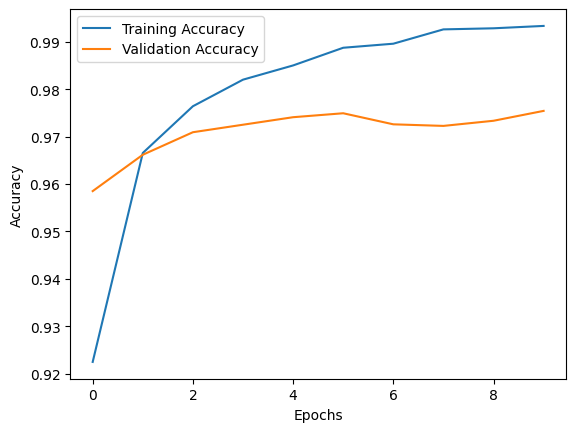

In [10]:
# Train the model with training data
# Epochs: Number of times the entire training dataset is processed
# Batch size: Number of samples processed before updating the model's weights
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Visualize the training process
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


5.Model Evaluation

In [11]:
# Evaluate the model on unseen test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
# Save the trained model to a file for future use
model.save('mnist_classifier.h5')
print("Model saved as 'mnist_classifier.h5'")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9694 - loss: 0.1243


Test Accuracy: 97.35%
Model saved as 'mnist_classifier.h5'


6.Load and Use Model Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


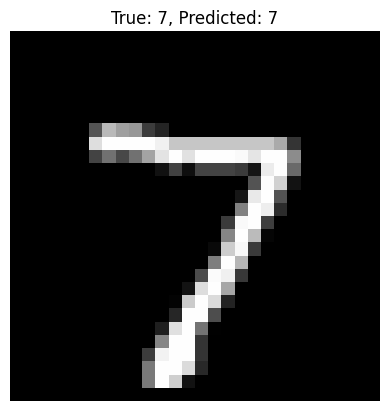

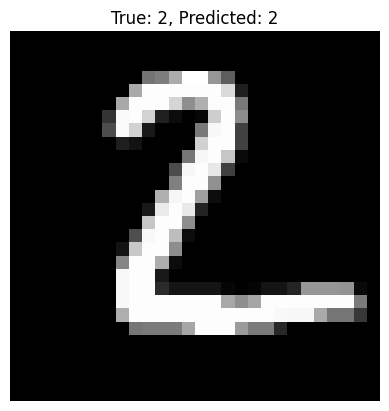

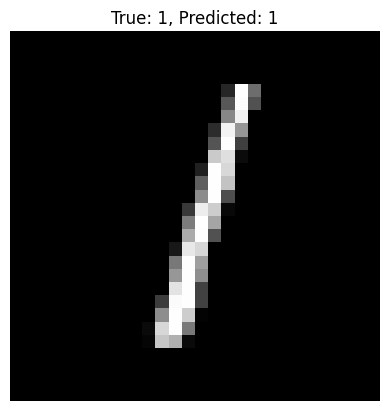

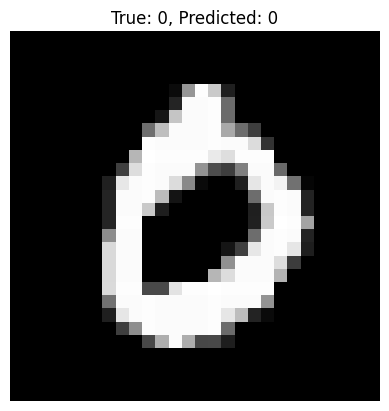

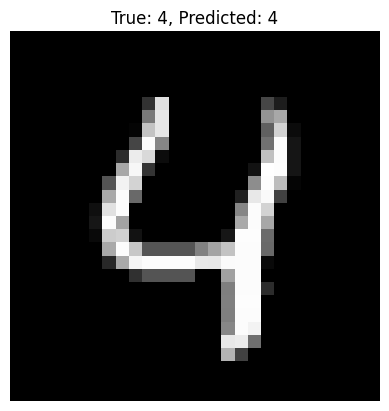

In [12]:
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mnist_classifier.h5')

# Make predictions on test data
predictions = model.predict(x_test)

# Display a few test images along with their predicted and true labels
def plot_sample(index):
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f"True: {np.argmax(y_test[index])}, Predicted: {np.argmax(predictions[index])}")
    plt.axis('off')
    plt.show()

# Display the first 5 samples
for i in range(5):
    plot_sample(i)
